# Dataset

In [1]:
import pandas as pd
import numpy as np

# Define the severity levels
severity_levels = [0, 1, 2]

# Define possible diagnoses
diagnoses = ["Normal", "Pneumonia"]

# Initialize empty lists for each column
severity_list = []
diagnosis_list = []
medications_list = []
diet_list = []
exercise_list = []

# Generate 30,000 records
num_records = 30000

for _ in range(num_records):
    # Randomly select severity and diagnosis
    severity = np.random.choice(severity_levels)
    diagnosis = np.random.choice(diagnoses)
    
    # Randomly generate medications, diet, and exercise
    medications = ", ".join(np.random.choice(["Antibiotics", "Corticosteroids", "Pain relievers", "Inhaler", "Oxygen therapy"], size=np.random.randint(1, 4)))
    diet = ", ".join(np.random.choice(["Balanced diet", "Liquid diet", "High-protein, low-carb diet", "Chicken soup", "Regular balanced diet"], size=np.random.randint(1, 4)))
    exercise = ", ".join(np.random.choice(["Breathing exercises", "Light stretching", "Yoga", "Moderate-intensity cardio", "Swimming"], size=np.random.randint(1, 4)))
    
    # Append values to respective lists
    severity_list.append(severity)
    diagnosis_list.append(diagnosis)
    medications_list.append(medications)
    diet_list.append(diet)
    exercise_list.append(exercise)

# Create a DataFrame
data = pd.DataFrame({
    'Severity': severity_list,
    'Diagnosis': diagnosis_list,
    'Medications': medications_list,
    'Diet': diet_list,
    'Exercise': exercise_list
})

# Save the dataset to a CSV file
data.to_csv('medical_dataset.csv', index=False)


# Model Training

Pre - Process Data

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Load your dataset here
# Assuming you have a DataFrame called 'data'

# Preprocessing
X = data.drop('Diagnosis', axis=1)
y = data['Diagnosis']

# Encoding categorical data
encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)
dummy_y = to_categorical(encoded_Y)

# Reshape the input
number_of_features = X.shape[1]
X = X.values.reshape(-1, number_of_features)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, dummy_y, test_size=0.2, random_state=0)


Train DL Model

In [9]:
from keras.models import Sequential
from keras.layers import Dense

# DL Model
dl_model = Sequential()
dl_model.add(Dense(32, input_dim=number_of_features, activation='relu'))
dl_model.add(Dense(16, activation='relu'))
dl_model.add(Dense(2, activation='softmax'))

# Compile the DL model
dl_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the DL model
dl_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)



Epoch 1/10
750/750 [==============================] - 3s 3ms/step - loss: 2.2984 - accuracy: 0.5010 - val_loss: 0.8162 - val_accuracy: 0.5027
Epoch 2/10
750/750 [==============================] - 2s 2ms/step - loss: 0.7644 - accuracy: 0.4958 - val_loss: 0.8254 - val_accuracy: 0.4992
Epoch 3/10
750/750 [==============================] - 2s 2ms/step - loss: 0.7516 - accuracy: 0.5005 - val_loss: 0.7256 - val_accuracy: 0.5013
Epoch 4/10
750/750 [==============================] - 2s 2ms/step - loss: 0.7390 - accuracy: 0.4988 - val_loss: 0.7943 - val_accuracy: 0.5002
Epoch 5/10
750/750 [==============================] - 2s 2ms/step - loss: 0.7517 - accuracy: 0.5016 - val_loss: 0.7119 - val_accuracy: 0.5008
Epoch 6/10
750/750 [==============================] - 2s 2ms/step - loss: 0.7435 - accuracy: 0.4980 - val_loss: 0.7409 - val_accuracy: 0.5102
Epoch 7/10
750/750 [==============================] - 2s 2ms/step - loss: 0.7473 - accuracy: 0.5043 - val_loss: 0.7187 - val_accuracy: 0.4972
Epoch 

ANN Model

In [4]:
# ANN Model
ann_model = Sequential()
ann_model.add(Dense(32, input_dim=number_of_features, activation='relu'))
ann_model.add(Dense(16, activation='relu'))
ann_model.add(Dense(2, activation='softmax'))

# Compile the ANN model
ann_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the ANN model
ann_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)


Epoch 1/10
750/750 [==============================] - 3s 2ms/step - loss: 1.1971 - accuracy: 0.4951 - val_loss: 0.7043 - val_accuracy: 0.4947
Epoch 2/10
750/750 [==============================] - 2s 2ms/step - loss: 0.7093 - accuracy: 0.5030 - val_loss: 0.7015 - val_accuracy: 0.4965
Epoch 3/10
750/750 [==============================] - 2s 2ms/step - loss: 0.7059 - accuracy: 0.5010 - val_loss: 0.6996 - val_accuracy: 0.5048
Epoch 4/10
750/750 [==============================] - 2s 2ms/step - loss: 0.7046 - accuracy: 0.5016 - val_loss: 0.7345 - val_accuracy: 0.4995
Epoch 5/10
750/750 [==============================] - 2s 2ms/step - loss: 0.7054 - accuracy: 0.4964 - val_loss: 0.6962 - val_accuracy: 0.5002
Epoch 6/10
750/750 [==============================] - 2s 2ms/step - loss: 0.7017 - accuracy: 0.5067 - val_loss: 0.6980 - val_accuracy: 0.4995
Epoch 7/10
750/750 [==============================] - 2s 2ms/step - loss: 0.7022 - accuracy: 0.4998 - val_loss: 0.6965 - val_accuracy: 0.5027
Epoch 

Evaluate and Save best Model

In [5]:
# Evaluate and display the accuracy of each model
_, dl_accuracy = dl_model.evaluate(X_test, y_test)
_, ann_accuracy = ann_model.evaluate(X_test, y_test)

print(f"DL Model Accuracy: {dl_accuracy}")
print(f"ANN Model Accuracy: {ann_accuracy}")

# Save the best model
if dl_accuracy > ann_accuracy:
    best_model = dl_model
else:
    best_model = ann_model

best_model.save('best_model.h5')


188/188 [==============================] - 0s 2ms/step - loss: 0.6966 - accuracy: 0.4983
DL Model Accuracy: 0.5021666884422302
ANN Model Accuracy: 0.4983333349227905


c:\Users\bveer\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Visualization

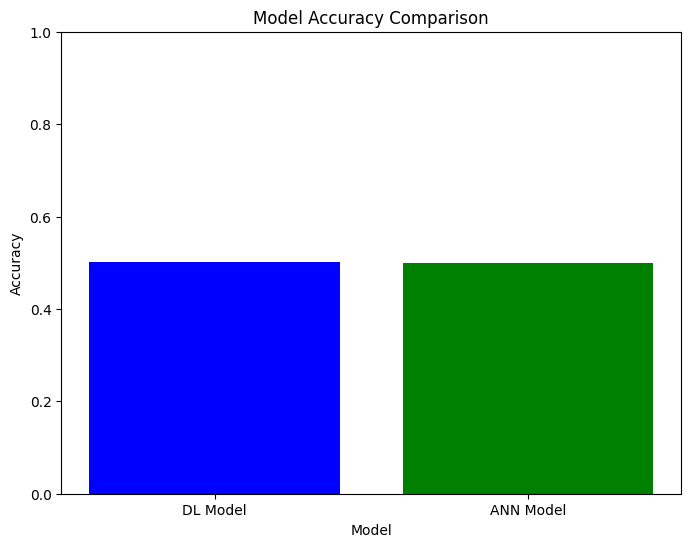

In [7]:
import matplotlib.pyplot as plt

# Model names and accuracies
model_names = ["DL Model", "ANN Model"]
accuracies = [dl_accuracy, ann_accuracy]

# Create a bar chart to visualize the accuracy of each model
plt.figure(figsize=(8, 6))
plt.bar(model_names, accuracies, color=['blue', 'green'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)  # Set the y-axis limit from 0 to 1 for accuracy
plt.show()


# GUI

In [1]:
import tkinter as tk
from tkinter import ttk
from tkinter import messagebox
import pandas as pd
import numpy as np

# Load your dataset
data = pd.read_csv('medical_dataset.csv')

# Function to recommend medications, diet, and exercises
def recommend():
    # Retrieve patient input (severity and diagnosis)
    severity = int(severity_var.get())
    diagnosis = diagnosis_var.get()
    
    # Filter data based on severity and diagnosis
    filtered_data = data[(data['Severity'] == severity) & (data['Diagnosis'] == diagnosis)]
    
    if len(filtered_data) == 0:
        messagebox.showinfo("Recommendations", "No recommendations found for the selected severity and diagnosis.")
        return
    
    # Randomly select a recommendation from the filtered data
    random_index = np.random.randint(0, len(filtered_data))
    medications = filtered_data.iloc[random_index]['Medications']
    diet = filtered_data.iloc[random_index]['Diet']
    exercise = filtered_data.iloc[random_index]['Exercise']
    
    # Display the recommendations
    recommendations_label.config(text=f"Medications: {medications}\nDiet: {diet}\nExercise: {exercise}", fg="blue")

# Function to clear selected fields
def clear_fields():
    severity_var.set('')
    diagnosis_var.set('')
    recommendations_label.config(text="", fg="black")

# Function to exit the GUI
def exit_app():
    root.destroy()

# Create the main application window
root = tk.Tk()
root.title("Medical Recommendation System")
root.geometry("500x400")  # Increased size for better appearance

# Add some space
space1 = tk.Label(root, text="", font=("Arial", 12))
space1.pack()

# Severity dropdown
severity_label = tk.Label(root, text="Severity:", font=("Arial", 14))
severity_label.pack()
severity_var = tk.StringVar()
severity_dropdown = ttk.Combobox(root, textvariable=severity_var, font=("Arial", 12))
severity_dropdown['values'] = (0, 1, 2)
severity_dropdown.pack()

# Add some space
space2 = tk.Label(root, text="", font=("Arial", 12))
space2.pack()

# Diagnosis dropdown
diagnosis_label = tk.Label(root, text="Diagnosis:", font=("Arial", 14))
diagnosis_label.pack()
diagnosis_var = tk.StringVar()
diagnosis_dropdown = ttk.Combobox(root, textvariable=diagnosis_var, font=("Arial", 12))
diagnosis_dropdown['values'] = ("Normal", "Pneumonia")
diagnosis_dropdown.pack()

# Add some space
space3 = tk.Label(root, text="", font=("Arial", 12))
space3.pack()

# Button to get recommendations
recommend_button = tk.Button(root, text="Get Recommendations", command=recommend, font=("Arial", 14))
recommend_button.pack()

# Add some space
space4 = tk.Label(root, text="", font=("Arial", 12))
space4.pack()

# Button to clear selected fields
clear_button = tk.Button(root, text="Clear", command=clear_fields, font=("Arial", 14))
clear_button.pack()

# Button to exit the GUI
exit_button = tk.Button(root, text="Exit", command=exit_app, font=("Arial", 14), bg="red", fg="white")
exit_button.pack()

# Label to display recommendations
recommendations_label = tk.Label(root, text="", wraplength=400, font=("Arial", 12))
recommendations_label.pack()

root.mainloop()
